# Fabrication des graphes pour la journée d'études sur les chaines de référence

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
# rep="/Users/gilles/Downloads/Traitements_GB/"
rep="/Users/gilles/Github/AMBK-SportsCom/Chaines/Traitements_GB/"
nFile="JEParis-Stats-RefSynTour.xlsx"

In [5]:
xls = pd.ExcelFile(rep+nFile)

In [6]:
xls.sheet_names

['Dist-Long',
 'Dist-Cat-root',
 'Spk-Dist-Long',
 'Spk-Dist-Cat',
 'Type-Dist-Long',
 'Type-Dist-Cat']

## Distribution globale de la longueur des chaines

In [13]:
dfDistLong=pd.read_excel(xls,"Dist-Long")
maxLChaines=len(dfDistLong)
maxLChaines

14

In [14]:
dfDistLong.set_index("Long",inplace=True)

In [15]:
pieCut=4
dfTemp=dfDistLong[:pieCut].copy()
autres=pd.DataFrame(dfDistLong[pieCut:].sum()).T
autres.index=["%d+"%(pieCut+1)]

In [16]:
colors=sns.color_palette('pastel',n_colors=maxLChaines)

In [255]:
dfTemp=pd.concat([dfTemp,autres])
dfTemp.rename(columns={"FrAr":"France-Argentine","FrNz":"France-Nouvelle Zélande"},inplace=True)

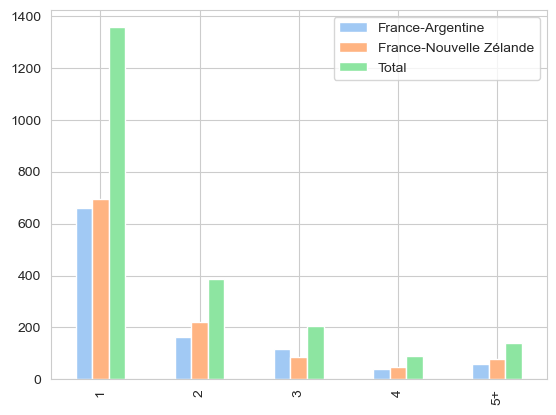

In [256]:
dfTemp.plot.bar(color=colors)
plt.savefig("JE-BP-LongChaines-FrAr-FrNz-Tot.pdf",bbox_inches = "tight")

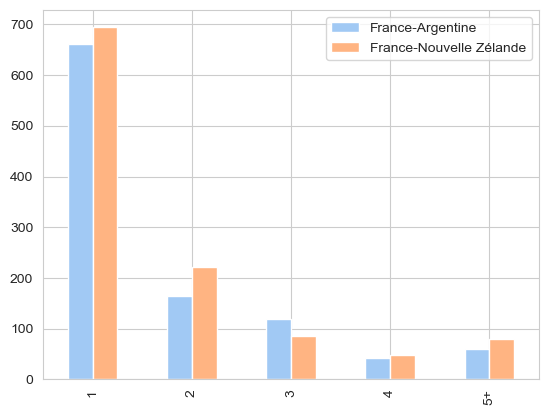

In [258]:
dfTemp.plot.bar(y=[0,1],color=colors)
plt.savefig("JE-BP-LongChaines-FrAr-FrNz.pdf",bbox_inches = "tight")

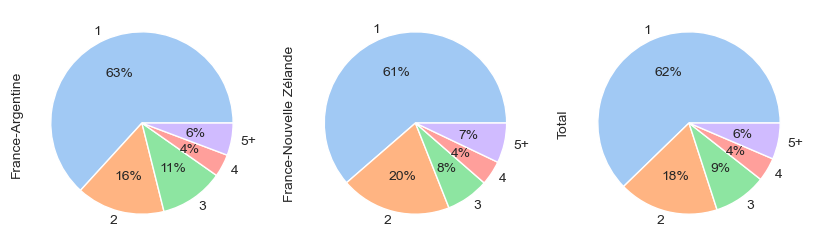

In [259]:
ax=dfTemp.plot.pie(colors=colors, autopct='%.0f%%',
                   #title="Distribution des longueurs de chaîne",
                   legend=False,subplots=True,
                   figsize=(10,5))
plt.savefig("JE-PC-LongChaines-FrAr-FrNz-Tot.pdf")

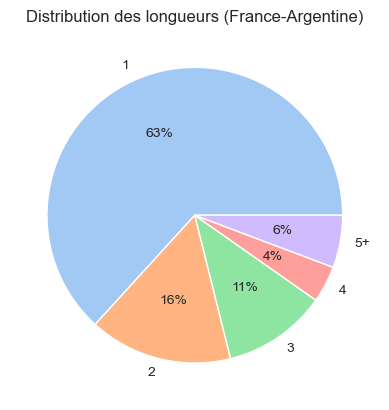

In [260]:
col=0
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-LongChaines-FrAr.pdf")

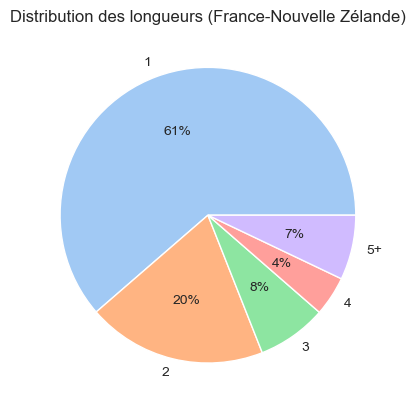

In [261]:
col=1
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-LongChaines-FrNz.pdf")

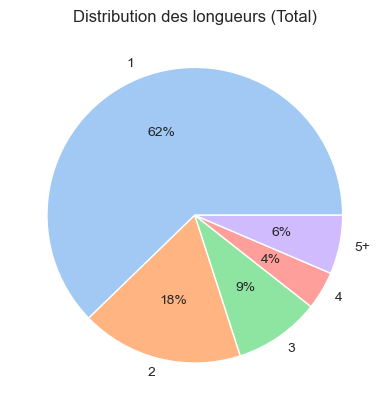

In [262]:
col=2
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-LongChaines-Tot.pdf")

## Distribution de la longueur par locuteur

In [17]:
dfDistSpk=pd.read_excel(xls,"Spk-Dist-Long")

In [18]:
dfDistSpk.set_index("Long",inplace=True)

In [19]:
spkCut=4

In [20]:
dfTemp=dfDistSpk[:spkCut].copy()
autres=pd.DataFrame(dfDistSpk[spkCut:].sum()).T
autres.index=["%d+"%(spkCut+1)]

In [21]:
dfTemp=pd.concat([dfTemp,autres])
dfTemp.rename(columns={"spk1":"Journaliste","spk2":"Expert"},inplace=True)
dfTemp

,spk1-FrAr,spk1-FrNz,spk2-FrAr,spk2-FrNz,Journaliste,Expert
1,500,442,104,258,942,1200
2,115,120,36,101,235,336
3,72,41,34,45,113,158
4,22,21,18,32,43,75
5+,27,37,25,48,64,112


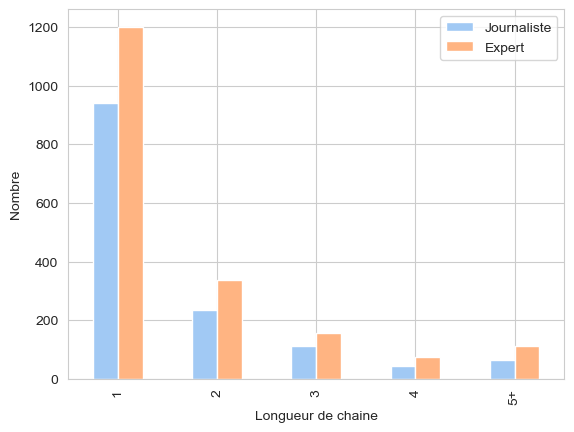

In [22]:
ax=dfTemp.plot.bar(y=[4,5],color=colors)
ax.set_ylabel("Nombre")
ax.set_xlabel("Longueur de chaine")
plt.savefig("JE-BP-Spk-LongChaines.pdf",bbox_inches = "tight")

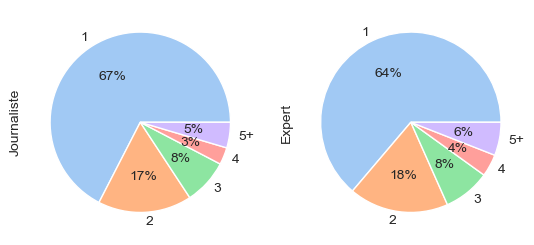

In [23]:
ax=dfTemp.iloc[:,[4,5]].plot.pie(colors=colors, autopct='%.0f%%',
                                    # title="Distribution des longueurs",
                                    legend=False,subplots=True)
plt.savefig("JE-PC-Spk-LongChaines-Spk1-Spk2.pdf",bbox_inches = "tight")

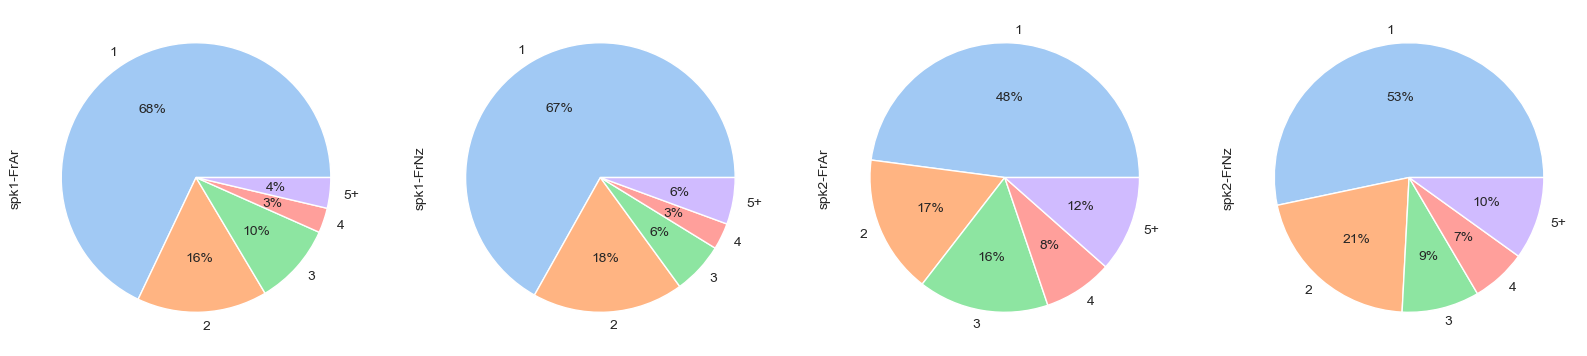

In [26]:
ax=dfTemp.iloc[:,[0,1,2,3]].plot.pie(colors=colors, autopct='%.0f%%',
                                     # title="Distribution des longueurs",
                                     legend=False,subplots=True,
                                     figsize=(20,20))
plt.savefig("JE-PC-Spk-LongChaines-Spk1-Spk2-FrAr-FrNz.pdf",bbox_inches = "tight")

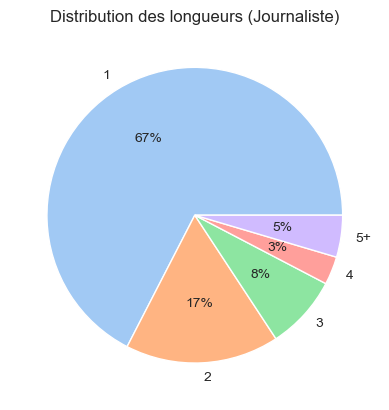

In [272]:
col=4
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-Spk-LongChaines-Spk1.pdf",bbox_inches = "tight")

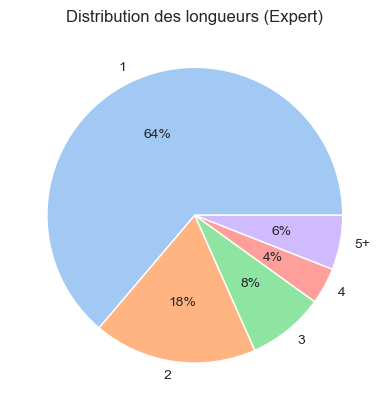

In [273]:
col=5
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-Spk-LongChaines-Spk2.pdf",bbox_inches = "tight")

## Distribution par type de commentaire

In [27]:
dfDistType=pd.read_excel(xls,"Type-Dist-Long")

In [28]:
dfDistType.set_index("long",inplace=True)

In [29]:
typeCut=4

In [30]:
dfTemp=dfDistType[:typeCut].copy()
autres=pd.DataFrame(dfDistType[typeCut:].sum()).T
autres.index=["%d+"%(typeCut+1)]

In [278]:
dfTemp=pd.concat([dfTemp,autres])
dfTemp.rename(columns={"CC":"Colour commentary","PP":"Play by play"},inplace=True)

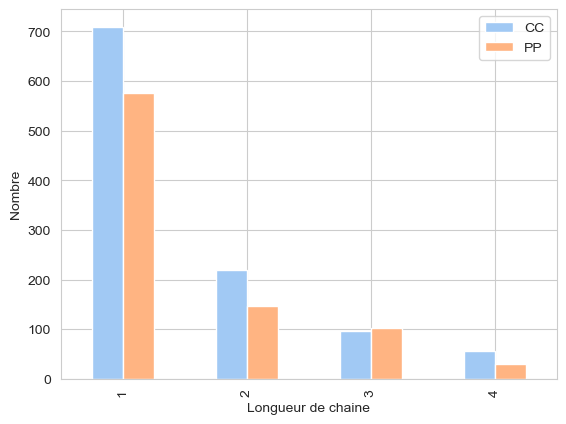

In [32]:
ax=dfTemp.iloc[:,[4,5]].plot.bar(color=colors)
ax.set_ylabel("Nombre")
ax.set_xlabel("Longueur de chaine")
plt.savefig("JE-BP-Type-LongChaines.pdf",bbox_inches="tight")

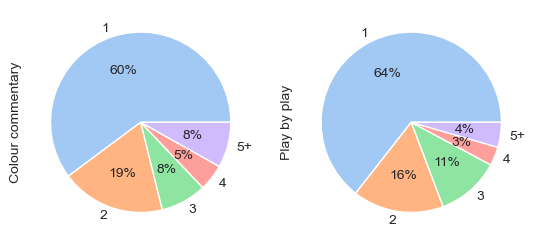

In [286]:
ax=dfTemp.iloc[:,[4,5]].plot.pie(colors=colors, autopct='%.0f%%',
                                    # title="Distribution des longueurs",
                                    legend=False,subplots=True)
plt.savefig("JE-PC-Type-LongChaines-CC-PP.pdf",bbox_inches="tight")

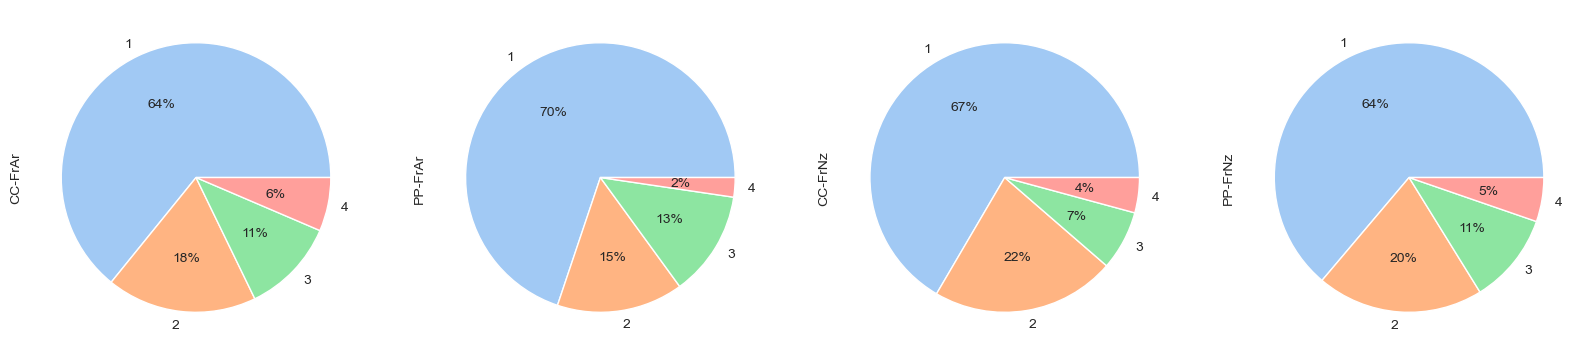

In [34]:
ax=dfTemp.iloc[:,[0,1,2,3]].plot.pie(colors=colors, autopct='%.0f%%',
                                    # title="Distribution des longueurs",
                                    legend=False,subplots=True,
                                     figsize=(20,20))
plt.savefig("JE-PC-Type-LongChaines-CC-PP-FrAr-FrNz.pdf",bbox_inches="tight")

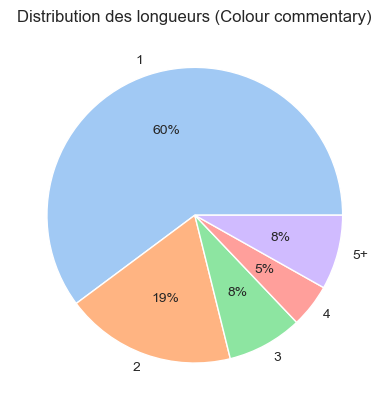

In [287]:
col=4
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-Type-LongChaines-CC.pdf",bbox_inches="tight")

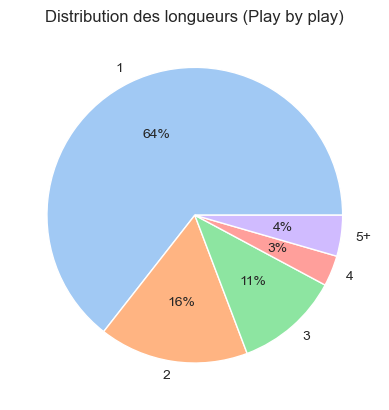

In [288]:
col=5
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Distribution des longueurs (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-Type-LongChaines-PP.pdf",bbox_inches="tight")

## Occurrences des catégories dans les chaines

In [289]:
dfNbCat=pd.read_excel(xls,"Dist-Cat-root")
dfNbCat.set_index("Cat",inplace=True)

In [290]:
dfNbCat.sort_values("Total",ascending=False,inplace=True)
dfNbCat.rename(columns={"FrAr":"France-Argentine","FrNz":"France-Nouvelle Zélande"},inplace=True)
dfNbCat

,France-Argentine,France-Nouvelle Zélande,Total
Cat,,,
PRO:PER,462,595,1057
PRO:REL,175,157,332
NOM,27,81,108
NAM,12,67,79
DET:POS,56,14,70
PRO:DEM,2,14,16
PRO:IND,1,1,2


In [291]:
catCut=5

In [292]:
dfTemp=dfNbCat[:catCut].copy()
autres=pd.DataFrame(dfNbCat[catCut:].sum()).T
autres.index=["PRO:autres"]

In [293]:
dfTemp=pd.concat([dfTemp,autres])
dfTemp#.rename(columns={"CC":"Colour commentary","PP":"Play by play"},inplace=True)

,France-Argentine,France-Nouvelle Zélande,Total
PRO:PER,462,595,1057
PRO:REL,175,157,332
NOM,27,81,108
NAM,12,67,79
DET:POS,56,14,70
PRO:autres,3,15,18


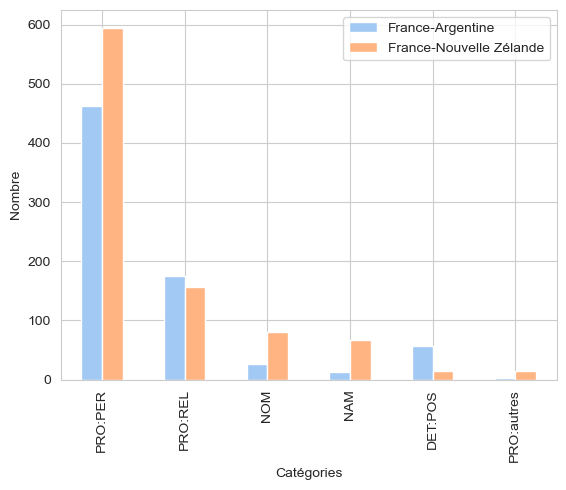

In [295]:
ax=dfTemp.plot.bar(y=[0,1],color=colors)
ax.set_ylabel("Nombre")
ax.set_xlabel("Catégories")
plt.savefig("JE-BP-NbCat-FrAr-FrNz.pdf",bbox_inches="tight")

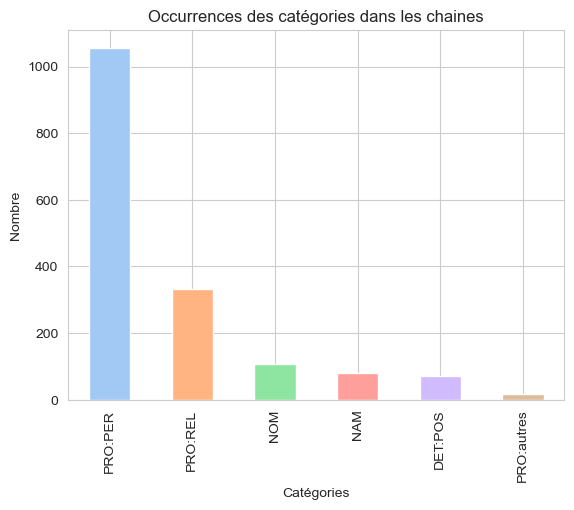

In [298]:
ax=dfTemp.plot.bar(y=2,color=colors,title="Occurrences des catégories dans les chaines",legend=None)
ax.set_ylabel("Nombre")
ax.set_xlabel("Catégories")
plt.savefig("JE-BP-NbCat.pdf",bbox_inches="tight")

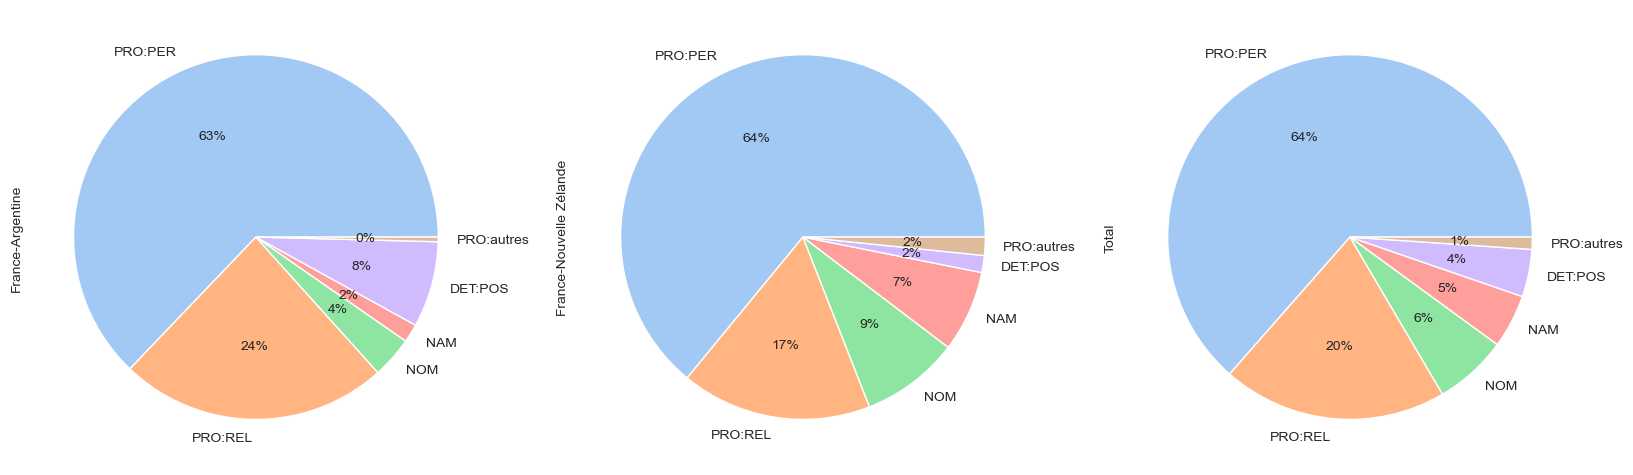

In [299]:
ax=dfTemp.plot.pie(colors=colors, 
                    autopct='%.0f%%',
                    # title="Distribution des longueurs",
                    legend=False,subplots=True,
                    figsize=(20,10))
plt.savefig("JE-PC-NbCat.pdf",bbox_inches="tight")

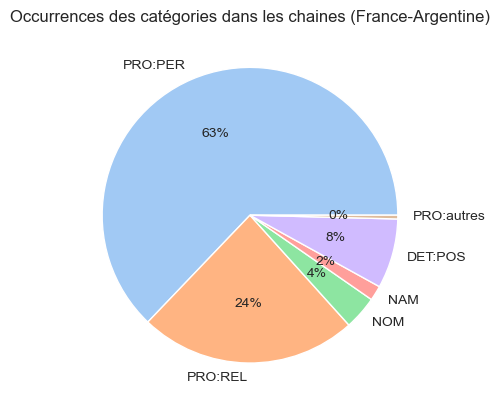

In [301]:
col=0
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Occurrences des catégories dans les chaines (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-NbCat-FrAr.pdf")

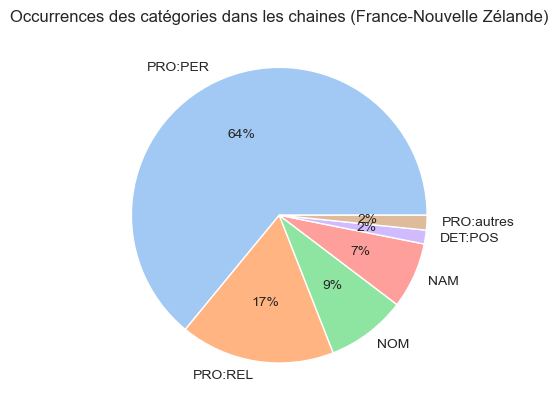

In [302]:
col=1
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Occurrences des catégories dans les chaines (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-NbCat-FrNz.pdf")

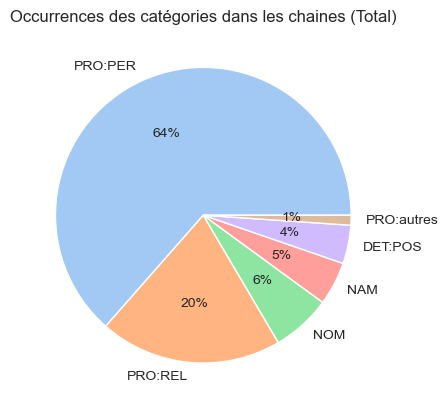

In [303]:
col=2
ax=dfTemp.plot.pie(y=col,colors=colors, autopct='%.0f%%',title="Occurrences des catégories dans les chaines (%s)"%dfTemp.columns[col],legend=False)
ax.set_ylabel(None)
plt.savefig("JE-PC-NbCat-Tot.pdf")